In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
import os
os.path

# lista todos los contenidos en una carpeta
def listar_ficheros(directory_name):
    file_list = os.listdir(directory_name)
    #print(file_list)
    lista2 = []
    for file_name in file_list:
        lista2.append(os.path.join(directory_name, file_name))
    return lista2, file_list

# Elimina la primera linea de los ficheros, que es basura
def pop(file):
    with open(file, 'r+') as f: # open file in read / write mode
        firstLine = f.readline() # read the first line and throw it out
        data = f.read() # read the rest
        f.seek(0) # set the cursor to the top of the file
        f.write(data) # write the data back
        f.truncate() # set the file size to the current size
        return firstLine

def save(file_name, data):
    with open(file_name, "w") as f:
        if type(data) == list:
            for line in data:
                f.write(line)
        else:
            f.write(data)

def readfrom(file_name, line=1):
    """ comeinza a leer desde la segunda linea """
    with open(file_name, "r") as f:
        rows = f.readlines()[line:]
    return rows

## Quitar Columna Superior de PaSCO de Relleno

In [49]:
origen_rel_path = "../Datos Lab4/0930 Difraccion 1/Data cruda/" 
output_rel_path = "../Datos Lab4/0930 Difraccion 1/Data trabajada/" 
nombres_ficheros, ficheros = listar_ficheros(origen_rel_path)

readfrom(nombres_ficheros[0],0)

for idx, nomfich in enumerate(nombres_ficheros):
    data = readfrom(nomfich)
    save(output_rel_path + ficheros[idx],data)

Hacer un plot Simple

In [13]:
origen_rel_path = "../Datos Lab4/0930 Difraccion 1/Data cruda/" 
output_rel_path = "../Datos Lab4/0930 Difraccion 1/Data trabajada/" 
nombres_ficheros, ficheros = listar_ficheros(output_rel_path)

len(nombres_ficheros)
print(ficheros)

['111H.txt', '111He.txt', '112H.txt', '113H.txt', '114peeH.txt', '115AR.txt', 'Mercurio.txt', 'vapor de awa1.txt']


In [34]:

df111H = pd.read_csv(nombres_ficheros[0], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
df111He = pd.read_csv(nombres_ficheros[1], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
df112H = pd.read_csv(nombres_ficheros[2], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
df113H = pd.read_csv(nombres_ficheros[3], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
df114peeH = pd.read_csv(nombres_ficheros[4], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
df115AR = pd.read_csv(nombres_ficheros[5], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
dfMercurio = pd.read_csv(nombres_ficheros[6], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
dfVaporAwa = pd.read_csv(nombres_ficheros[7], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]

angul = 'ángulo (rad)'
inten = 'Intensidad luminosa (%)'

In [25]:
df114peeH.columns

Index(['ángulo (rad)', 'Intensidad luminosa (%)'], dtype='object')

In [78]:
# Funcion para analizar
def blackbox(dataframe : pd.DataFrame,order = True, angul: str = angul, inten: str = inten):
    if(order):
        dforder = df114peeH.sort_values(by=[angul])
    else:
        dforder = dataframe
    X = list(dforder[angul])
    Y = list(dforder[inten])
    return X,Y

In [79]:
#dfpeeH = df114peeH.sort_values(by=[angul])
#X = list(dfpeeH[angul])
#Y = list(dfpeeH[inten])
Xawa, Yawa = blackbox(dfVaporAwa, False)

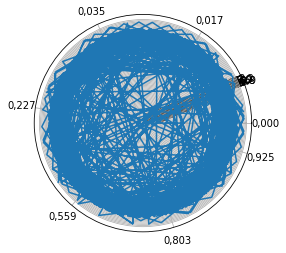

In [80]:
plt.polar(Xawa, Yawa)

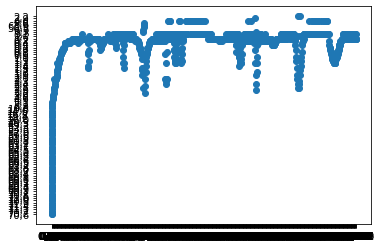

In [81]:
plt.scatter(Xawa,Yawa)